# Outliers

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Crea un DataFrame di esempio
data = {'Valori': [1, 2, 3, 4, 5, 10, 15, 20, 25, 300, 1000, 100000000, -50000000, -50]}
df = pd.DataFrame(data)
# Lista con outliers da entrambi i lati

# Calcola la media e la deviazione standard
mean_value = df['Valori'].mean()
std_dev = df['Valori'].std()

# Identifica gli outliers considerando ±3 sigma dalla media
outliers = df[(df['Valori'] > mean_value + 3 * std_dev) | (df['Valori'] < mean_value - 3 * std_dev)]
outliers

,Valori
11,100000000


# Grafico con outliers evidenziati

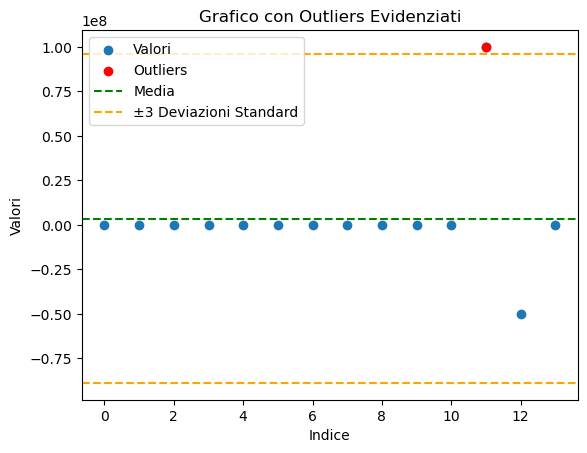

In [5]:
# Crea un grafico a dispersione
plt.scatter(df.index, df['Valori'], label='Valori')

# Evidenzia gli outliers nel grafico con un colore diverso
plt.scatter(outliers.index, outliers['Valori'], color='red', label='Outliers')

# Aggiungi la media e la deviazione standard al grafico
plt.axhline(y=mean_value, color='green', linestyle='--', label='Media')
plt.axhline(y=mean_value + 3 * std_dev, color='orange', linestyle='--', label='±3 Deviazioni Standard')
plt.axhline(y=mean_value - 3 * std_dev, color='orange', linestyle='--')

# Aggiungi etichette e legenda al grafico
plt.xlabel('Indice')
plt.ylabel('Valori')
plt.title('Grafico con Outliers Evidenziati')
plt.legend()

# Mostra il grafico
plt.show()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Crea un DataFrame di esempio con 4 features
data = {'Feature1': [1, 2000, 3, 4, 50000, 10, 15, 20, 2500000, 300000000, 100000000],
        'Feature2': [2, 4, 6, 8, 10, 20, 30, 40, 50000, 60, 200],
        'Feature3': [5, 10, 15, 20000, 25, 50, 75, 100, 125, 150, 500000],
        'Feature4': [1, -20000000, 3, 4000000000, 5, 10, 15, 20, 20005, 30, 10000]}

df = pd.DataFrame(data)

# Definisci il numero minimo di features che devono superare la soglia per considerare un dato un outlier
min_features_threshold = 1
k=2 #intervallo di confidenza 

# Lista per salvare gli indici degli outliers
outlier_indices = []

# Itera su ogni feature
for feature in df.columns:
    mean_value = df[feature].mean()
    std_dev = df[feature].std()
    
    # Identifica gli outliers per ciascuna feature
    df['Outlier_' + feature] = (df[feature] > mean_value + k * std_dev) | (df[feature] < mean_value - k * std_dev)

In [4]:
# Calcola il numero di features che superano la soglia per ogni riga
df['Num_Outliers'] = df.filter(like='Outlier_').sum(axis=1)
df

,Feature1,Feature2,Feature3,Feature4,Outlier_Feature1,Outlier_Feature2,Outlier_Feature3,Outlier_Feature4,Num_Outliers
0,1,2,5,1,False,False,False,False,0
1,2000,4,10,-20000000,False,False,False,False,0
2,3,6,15,3,False,False,False,False,0
3,4,8,20000,4000000000,False,False,False,True,1
4,50000,10,25,5,False,False,False,False,0
5,10,20,50,10,False,False,False,False,0
6,15,30,75,15,False,False,False,False,0
7,20,40,100,20,False,False,False,False,0
8,2500000,50000,125,20005,False,True,False,False,1
9,300000000,60,150,30,True,False,False,False,1


In [5]:
# Filtra i dati per mantenere solo le righe con almeno il numero minimo di features superanti la soglia
outliers = df[df['Num_Outliers'] >= min_features_threshold]

# Aggiungi una colonna che indica se il record è un outlier o meno
df['Is_Outlier'] = df.index.isin(outliers.index)
df

,Feature1,Feature2,Feature3,Feature4,Outlier_Feature1,Outlier_Feature2,Outlier_Feature3,Outlier_Feature4,Num_Outliers,Is_Outlier
0,1,2,5,1,False,False,False,False,0,False
1,2000,4,10,-20000000,False,False,False,False,0,False
2,3,6,15,3,False,False,False,False,0,False
3,4,8,20000,4000000000,False,False,False,True,1,True
4,50000,10,25,5,False,False,False,False,0,False
5,10,20,50,10,False,False,False,False,0,False
6,15,30,75,15,False,False,False,False,0,False
7,20,40,100,20,False,False,False,False,0,False
8,2500000,50000,125,20005,False,True,False,False,1,True
9,300000000,60,150,30,True,False,False,False,1,True


In [6]:
# Rimuovi colonne ausiliarie
df.drop(df.filter(like='Outlier_').columns, axis=1, inplace=True)
df.drop('Num_Outliers', axis=1, inplace=True)
df

,Feature1,Feature2,Feature3,Feature4,Is_Outlier
0,1,2,5,1,False
1,2000,4,10,-20000000,False
2,3,6,15,3,False
3,4,8,20000,4000000000,True
4,50000,10,25,5,False
5,10,20,50,10,False
6,15,30,75,15,False
7,20,40,100,20,False
8,2500000,50000,125,20005,True
9,300000000,60,150,30,True


# Come vengono rappresentati gli outliers di più features

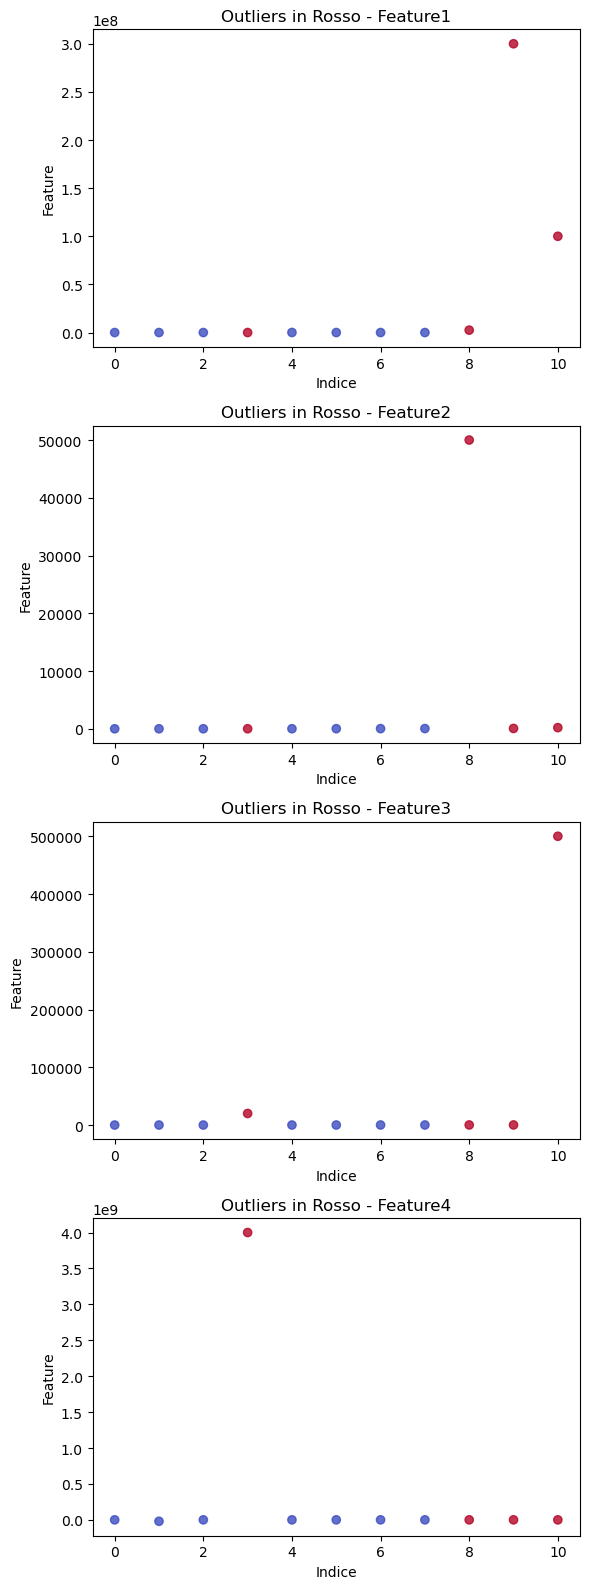

In [7]:
# Organizza i grafici in una matrice, con una colonna e 4 righe
num_features = len(df.columns) - 1  # Escludi la colonna 'Is_Outlier'
num_rows = num_features
num_cols = 1  # Una colonna

plt.figure(figsize=(6, 4 * num_rows))
for i, feature in enumerate(df.columns[:-1]):  # Escludi la colonna 'Is_Outlier'
    plt.subplot(num_rows, num_cols, i + 1)
    plt.scatter(df.index, df[feature], c=df['Is_Outlier'], cmap='coolwarm', alpha=0.8)
    plt.title(f'Outliers in Rosso - {feature}')
    plt.xlabel('Indice')
    plt.ylabel('Feature')

plt.tight_layout()
plt.show()

In [8]:
#Elimina le righe corrispondenti agli outliers quelli che hanno almeno una feature fuori scala
df_filtred = df[df['Is_Outlier'] == False]
df_filtred

,Feature1,Feature2,Feature3,Feature4,Is_Outlier
0,1,2,5,1,False
1,2000,4,10,-20000000,False
2,3,6,15,3,False
4,50000,10,25,5,False
5,10,20,50,10,False
6,15,30,75,15,False
7,20,40,100,20,False


# Calcolare la deviazione standard

In [1]:
def calcola_deviazione_standard(lista):
    n = len(lista)
    
    # Calcola la media
    media = sum(lista) / n
    
    # Calcola la somma dei quadrati delle differenze dalla media
    somma_quadrati_diff = sum((x - media) ** 2 for x in lista)
    
    # Calcola la deviazione standard
    deviazione_standard = (somma_quadrati_diff / n) ** 0.5
    
    return deviazione_standard

# Esempio di utilizzo
numero_lista = [1, 2, 3, 4, 5]
deviazione_standard = calcola_deviazione_standard(numero_lista)

# Stampa il risultato
print(f"La deviazione standard della lista è: {deviazione_standard}")

La deviazione standard della lista è: 1.4142135623730951


# Splitting dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Specifica il percorso del tuo file CSV
percorso_file_csv = "C:\\Users\\david\\Downloads\\pokemons.csv"

# Leggi il file CSV in un DataFrame
df = pd.read_csv(percorso_file_csv)

# Mostra le prime righe del DataFrame (opzionale)
print(df.head())
df.shape

   id        name      rank    generation evolves_from  type1   type2  hp  \
0   1   bulbasaur  ordinary  generation-i      nothing  grass  poison  45   
1   2     ivysaur  ordinary  generation-i    bulbasaur  grass  poison  60   
2   3    venusaur  ordinary  generation-i      ivysaur  grass  poison  80   
3   4  charmander  ordinary  generation-i      nothing   fire    None  39   
4   5  charmeleon  ordinary  generation-i   charmander   fire    None  58   

   atk  def  spatk  spdef  speed  total  height  weight  \
0   49   49     65     65     45    318       7      69   
1   62   63     80     80     60    405      10     130   
2   82   83    100    100     80    525      20    1000   
3   52   43     60     50     65    309       6      85   
4   64   58     80     65     80    405      11     190   

               abilities                                               desc  
0  overgrow chlorophyll   A strange seed was planted on its back at birt...  
1  overgrow chlorophyll   

(1017, 18)

In [4]:
#omporta xlsx con fogli 
import pandas as pd

# Specifica il percorso del tuo file Excel
percorso_file_excel = "C:\\Users\\david\\Downloads\\serieA.xlsx"

# Leggi il file Excel in un DataFrame

df = pd.read_excel(percorso_file_excel, sheet_name='09-10')

# Ora puoi lavorare con il DataFrame df, che contiene i dati dal tuo file Excel

df

,position,team,Pt,Played,Won,Net,lose,Goals made,Goals suffered,Difference goals
0,1,Inter Inter,82,38,24,10,4,75,34,41
1,2,Roma Roma,80,38,24,8,6,68,41,27
2,3,Milan Milan,70,38,20,10,8,60,39,21
3,4,Sampdoria Sampdoria,67,38,19,10,9,49,41,8
4,5,Palermo Palermo,65,38,18,11,9,59,47,12
5,6,Napoli Napoli,59,38,15,14,9,50,43,7
6,7,Juventus Juventus,55,38,16,7,15,55,56,-1
7,8,Parma Parma,52,38,14,10,14,46,51,-5
8,9,Genoa Genoa,51,38,14,9,15,57,61,-4
9,10,Bari Bari,50,38,13,11,14,49,49,0


In [10]:
import numpy as np
from sklearn.model_selection import train_test_split

# Creare dati casuali per altezze (variabile indipendente) e pesi (variabile dipendente)
np.random.seed(0)
altezze = np.random.normal(160, 10, 100)
pesi = 0.5 * altezze + np.random.normal(0, 5, 100)

# Suddividere il dataset in training set (70%) e test set (30%)
X_train, X_test, y_train, y_test = train_test_split(altezze, pesi, test_size=0.3, random_state=42)

# Stampare le dimensioni dei training set e test set
print("Dimensioni del Training Set (altezze e pesi):", X_train.shape, y_train.shape)
print("Dimensioni del Test Set (altezze e pesi):", X_test.shape, y_test.shape)



Dimensioni del Training Set (altezze e pesi): (70,) (70,)
Dimensioni del Test Set (altezze e pesi): (30,) (30,)


# Lavoriamo un po' con i grafici

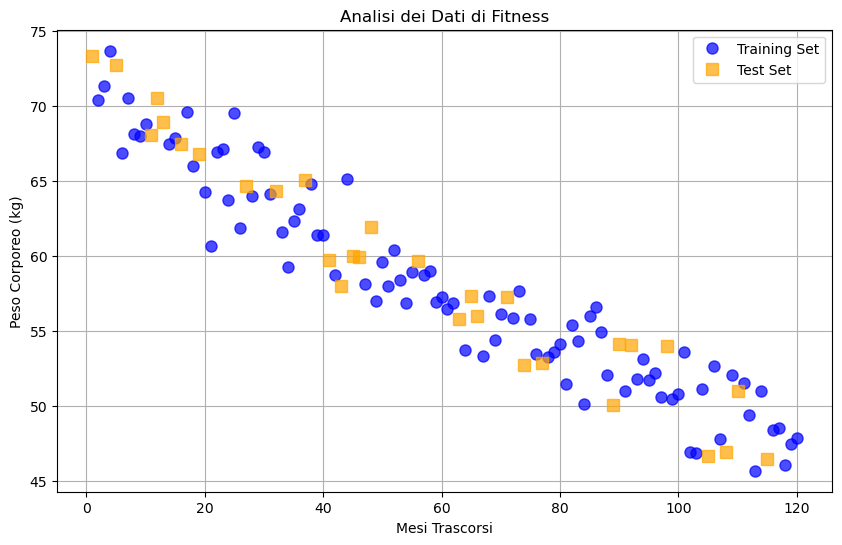

Dimensioni del Training Set (mesi trascorsi e peso corporeo): (90,) (90,)
Dimensioni del Test Set (mesi trascorsi e peso corporeo): (30,) (30,)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Creazione di dati casuali per mesi trascorsi e peso corporeo
np.random.seed(0)
n=120
mesi_trascorsi = np.arange(1, n+1)
peso_corporeo = 70 - 0.2 * mesi_trascorsi + np.random.normal(0, 2, n)

# Suddivisione del dataset in training set (75%) e test set (25%)
X_train, X_test, y_train, y_test = train_test_split(mesi_trascorsi, peso_corporeo, test_size=0.25, random_state=42)

# Creazione di un grafico a linee
plt.figure(figsize=(10, 6))
plt.plot(X_train, y_train, label='Training Set', marker='o', color='blue', linestyle='', markersize=8,alpha=0.7)
plt.plot(X_test, y_test, label='Test Set', marker='s', color='orange', linestyle='', markersize=8,alpha=0.7)
plt.xlabel('Mesi Trascorsi')
plt.ylabel('Peso Corporeo (kg)')
plt.title('Analisi dei Dati di Fitness')
plt.legend()
plt.grid(True)
plt.show()

# Stampare le dimensioni dei training set e test set
print("Dimensioni del Training Set (mesi trascorsi e peso corporeo):", X_train.shape, y_train.shape)
print("Dimensioni del Test Set (mesi trascorsi e peso corporeo):", X_test.shape, y_test.shape)

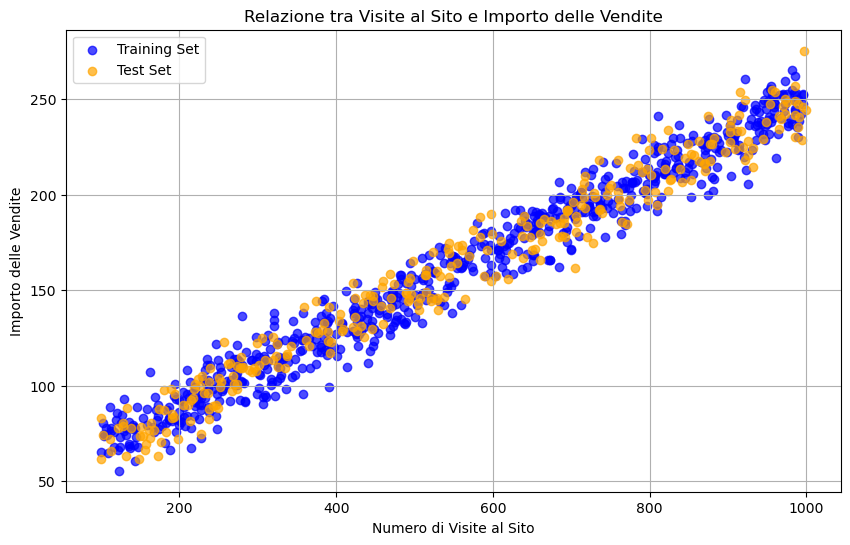

Dimensioni del Training Set (visite al sito e importo delle vendite): (700,) (700,)
Dimensioni del Test Set (visite al sito e importo delle vendite): (300,) (300,)


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Creazione di dati casuali per visite al sito web e importo delle vendite
np.random.seed(0)
visite_al_sito = np.random.randint(100, 1000, 1000)
importo_vendite = 50 + 0.2 * visite_al_sito + np.random.normal(0, 10, 1000)

# Suddivisione del dataset in training set (70%) e test set (30%)
X_train, X_test, y_train, y_test = train_test_split(visite_al_sito, importo_vendite, test_size=0.3, random_state=42)

# Creazione di un grafico a dispersione
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, label='Training Set', color='blue', alpha=0.7)
plt.scatter(X_test, y_test, label='Test Set', color='orange', alpha=0.7)
plt.xlabel('Numero di Visite al Sito')
plt.ylabel('Importo delle Vendite')
plt.title('Relazione tra Visite al Sito e Importo delle Vendite')
plt.legend()
plt.grid(True)
plt.show()

# Stampare le dimensioni dei training set e test set
print("Dimensioni del Training Set (visite al sito e importo delle vendite):", X_train.shape, y_train.shape)
print("Dimensioni del Test Set (visite al sito e importo delle vendite):", X_test.shape, y_test.shape)


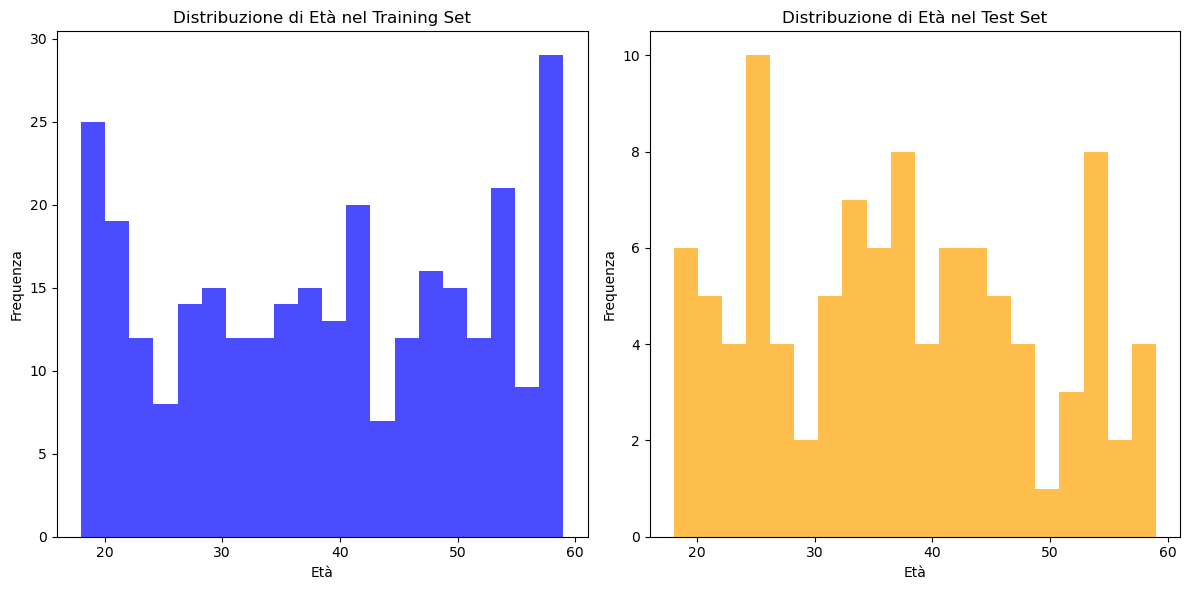

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Creazione di dati casuali per età
np.random.seed(0)
eta_training_set = np.random.randint(18, 60, 300)
eta_test_set = np.random.randint(18, 60, 100)

# Confronto delle distribuzioni di età
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(eta_training_set, bins=20, color='blue', alpha=0.7)
plt.title('Distribuzione di Età nel Training Set')
plt.xlabel('Età')
plt.ylabel('Frequenza')

plt.subplot(1, 2, 2)
plt.hist(eta_test_set, bins=20, color='orange', alpha=0.7)
plt.title('Distribuzione di Età nel Test Set')
plt.xlabel('Età')
plt.ylabel('Frequenza')

plt.tight_layout()
plt.show()

# Proporzioni classi

In [3]:
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(1)
# Supponiamo di avere un dataset con feature X e target y
X = np.random.rand(100, 2)  # Dati del dataset (100 campioni, 2 feature)
y = np.random.choice(['A', 'B'], size=100)  # Etichette di classe casuali
# Calcola le proporzioni delle classi nel dataset originale
proporzione_classe_A = sum(y == 'A') / len(y)
proporzione_classe_B = 1 - proporzione_classe_A
# Eseguire uno split stratificato con una proporzione specificata
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Calcola le proporzioni delle classi nel training set e nel test set
proporzione_classe_A_train = sum(y_train == 'A') / len(y_train)
proporzione_classe_B_train = 1 - proporzione_classe_A_train

proporzione_classe_A_test = sum(y_test == 'A') / len(y_test)
proporzione_classe_B_test = 1 - proporzione_classe_A_test

# Stampa delle proporzioni
print("Proporzione Classe A nel data Set completo:", proporzione_classe_A)
print("Proporzione Classe B nel data Setcompleto:", proporzione_classe_B)
print("Proporzione Classe A nel Training Set:", proporzione_classe_A_train)
print("Proporzione Classe B nel Training Set:", proporzione_classe_B_train)
print("Proporzione Classe A nel Test Set:", proporzione_classe_A_test)
print("Proporzione Classe B nel Test Set:", proporzione_classe_B_test)

Proporzione Classe A nel data Set completo: 0.54
Proporzione Classe B nel data Setcompleto: 0.45999999999999996
Proporzione Classe A nel Training Set: 0.5285714285714286
Proporzione Classe B nel Training Set: 0.4714285714285714
Proporzione Classe A nel Test Set: 0.5666666666666667
Proporzione Classe B nel Test Set: 0.43333333333333335


# Media in una popolazione

In [3]:
import random
import numpy as np

dataset=[]
# Creazione di un dataset di 1000 elementi (ad esempio, dati casuali)
popolazione =24000000
for i in range(popolazione):
    dataset.append(random.randint(0, 100000))
    
campione = int(round(0.3 * popolazione))# Estrazione di un campione casuale semplice dal dataset
campione_casuale = random.sample(dataset, campione)

# Calcolo della media e della deviazione standard del campione
media_campione = np.mean(campione_casuale)
deviazione_standard_campione = np.std(campione_casuale)

# Calcolo della media e della deviazione standard del dataset completo
media_dataset = np.mean(dataset)
deviazione_standard_dataset = np.std(dataset)

print(f"Media del campione casuale: {media_campione: .2f}")
print(f"Deviazione standard del campione casuale: {deviazione_standard_campione: .2f}")
print(f"Media del dataset completo: {media_dataset: .2f}")
print(f"Deviazione standard del dataset completo: {deviazione_standard_dataset: .2f}")


Media del campione casuale:  50024.43
Deviazione standard del campione casuale:  28866.12
Media del dataset completo:  50021.90
Deviazione standard del dataset completo:  28867.82


# Generiamo colonne di un dataframe

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Impostare il seed per la riproducibilità
np.random.seed(42)
# Numero totale di elementi nel DataFrame
num_elementi = 100000
# Percentuale di "A"
percentuale_A = 0.7
# Generare la colonna con distribuzione desiderata
colonna = np.random.choice(['A', 'B'], size=num_elementi, p=[percentuale_A, 1 - percentuale_A])

# Creare il DataFrame
df = pd.DataFrame({'ColonnaAB': colonna})
df

,ColonnaAB
0,A
1,B
2,B
3,A
4,A
...,...
99995,B
99996,B
99997,A
99998,A


# Creazione subset

In [6]:
# Creare tre subset di dimensioni simili
subset1 = df.sample(frac=1/3)
df = df.drop(subset1.index)

subset2 = df.sample(frac=1/2)
df = df.drop(subset2.index)

subset3 = df  # L'ultimo subset con il rimanente

# Grafici a torta

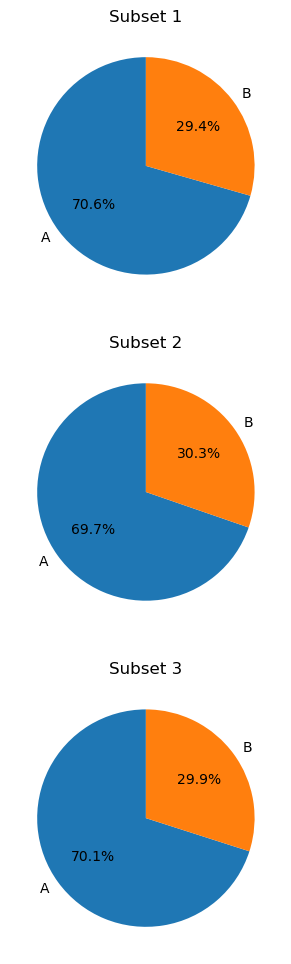

In [7]:
# Calcolare le percentuali di "A" e "B" per ogni subset
percentuali_subset1 = subset1['ColonnaAB'].value_counts(normalize=True)
percentuali_subset2 = subset2['ColonnaAB'].value_counts(normalize=True)
percentuali_subset3 = subset3['ColonnaAB'].value_counts(normalize=True)

# Creare i grafici a torta
fig, axs = plt.subplots(3, 1, figsize=(6, 12))

# Subset 1
axs[0].pie(percentuali_subset1, labels=percentuali_subset1.index, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Subset 1')

# Subset 2
axs[1].pie(percentuali_subset2, labels=percentuali_subset2.index, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Subset 2')

# Subset 3
axs[2].pie(percentuali_subset3, labels=percentuali_subset3.index, autopct='%1.1f%%', startangle=90)
axs[2].set_title('Subset 3')

# Mostrare il grafico
plt.show()

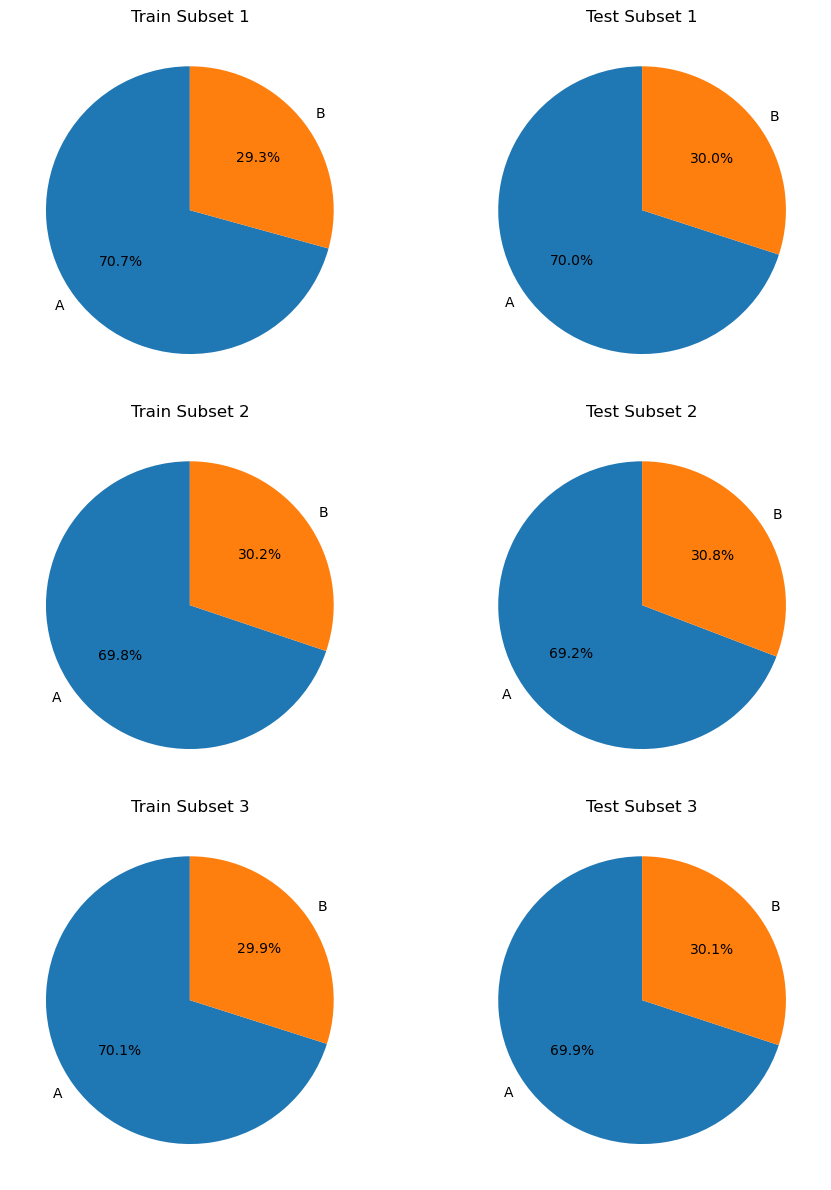

In [8]:
# Dividere ciascun subset in training set e test set
train_subset1, test_subset1 = train_test_split(subset1, test_size=0.2, random_state=42)
train_subset2, test_subset2 = train_test_split(subset2, test_size=0.2, random_state=42)
train_subset3, test_subset3 = train_test_split(subset3, test_size=0.2, random_state=42)

# Creare il grafico con 6 torte
fig, axs = plt.subplots(3, 2, figsize=(10, 12))

# Funzione per disegnare una torta con etichette
def draw_pie(ax, data, title):
    ax.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(title)

# Prima riga di torte (Subset 1)
draw_pie(axs[0, 0], train_subset1['ColonnaAB'].value_counts(normalize=True), 'Train Subset 1')
draw_pie(axs[0, 1], test_subset1['ColonnaAB'].value_counts(normalize=True), 'Test Subset 1')

# Seconda riga di torte (Subset 2)
draw_pie(axs[1, 0], train_subset2['ColonnaAB'].value_counts(normalize=True), 'Train Subset 2')
draw_pie(axs[1, 1], test_subset2['ColonnaAB'].value_counts(normalize=True), 'Test Subset 2')

# Terza riga di torte (Subset 3)
draw_pie(axs[2, 0], train_subset3['ColonnaAB'].value_counts(normalize=True), 'Train Subset 3')
draw_pie(axs[2, 1], test_subset3['ColonnaAB'].value_counts(normalize=True), 'Test Subset 3')

# Regolare lo spaziamento tra i subplots
plt.tight_layout()

# Mostrare il grafico
plt.show()

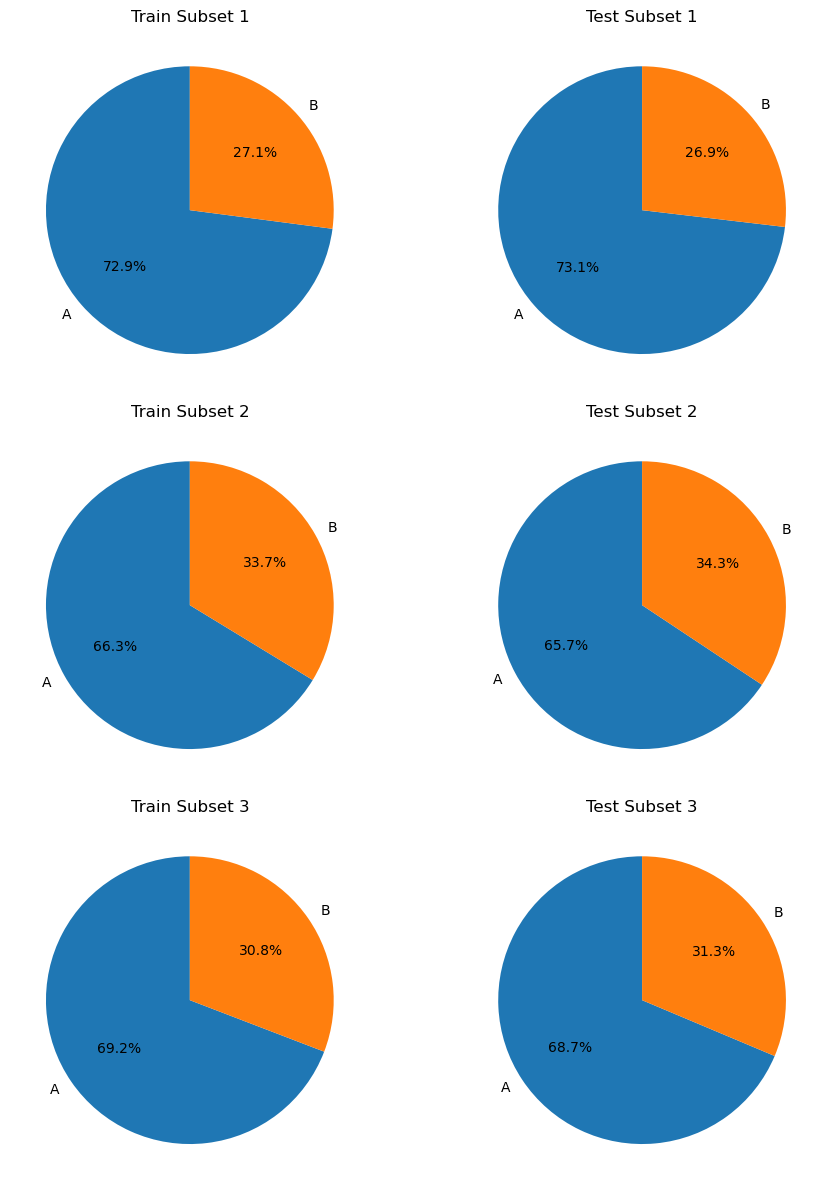

In [9]:
np.random.seed(41)

# Creare il DataFrame originale
num_elementi = 1000
percentuale_A = 0.7
colonna = np.random.choice(['A', 'B'], size=num_elementi, p=[percentuale_A, 1 - percentuale_A])
df = pd.DataFrame({'ColonnaAB': colonna})

# Creare tre subset di dimensioni simili
subset1 = df.sample(frac=1/3)
df = df.drop(subset1.index)

subset2 = df.sample(frac=1/2)
df = df.drop(subset2.index)

subset3 = df  # L'ultimo subset con il rimanente

# Dividere ciascun subset in training set e test set
train_subset1, test_subset1 = train_test_split(subset1, test_size=0.2, stratify=subset1['ColonnaAB'], random_state=42)
train_subset2, test_subset2 = train_test_split(subset2, test_size=0.2, stratify=subset2['ColonnaAB'], random_state=42)
train_subset3, test_subset3 = train_test_split(subset3, test_size=0.2, stratify=subset3['ColonnaAB'], random_state=42)

# Creare il grafico con 6 torte
fig, axs = plt.subplots(3, 2, figsize=(10, 12))

# Funzione per disegnare una torta con etichette
def draw_pie(ax, data, title):
    ax.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(title)

# Prima riga di torte (Subset 1)
draw_pie(axs[0, 0], train_subset1['ColonnaAB'].value_counts(normalize=True), 'Train Subset 1')
draw_pie(axs[0, 1], test_subset1['ColonnaAB'].value_counts(normalize=True), 'Test Subset 1')

# Seconda riga di torte (Subset 2)
draw_pie(axs[1, 0], train_subset2['ColonnaAB'].value_counts(normalize=True), 'Train Subset 2')
draw_pie(axs[1, 1], test_subset2['ColonnaAB'].value_counts(normalize=True), 'Test Subset 2')

# Terza riga di torte (Subset 3)
draw_pie(axs[2, 0], train_subset3['ColonnaAB'].value_counts(normalize=True), 'Train Subset 3')
draw_pie(axs[2, 1], test_subset3['ColonnaAB'].value_counts(normalize=True), 'Test Subset 3')

# Regolare lo spaziamento tra i subplots
plt.tight_layout()

# Mostrare il grafico
plt.show()

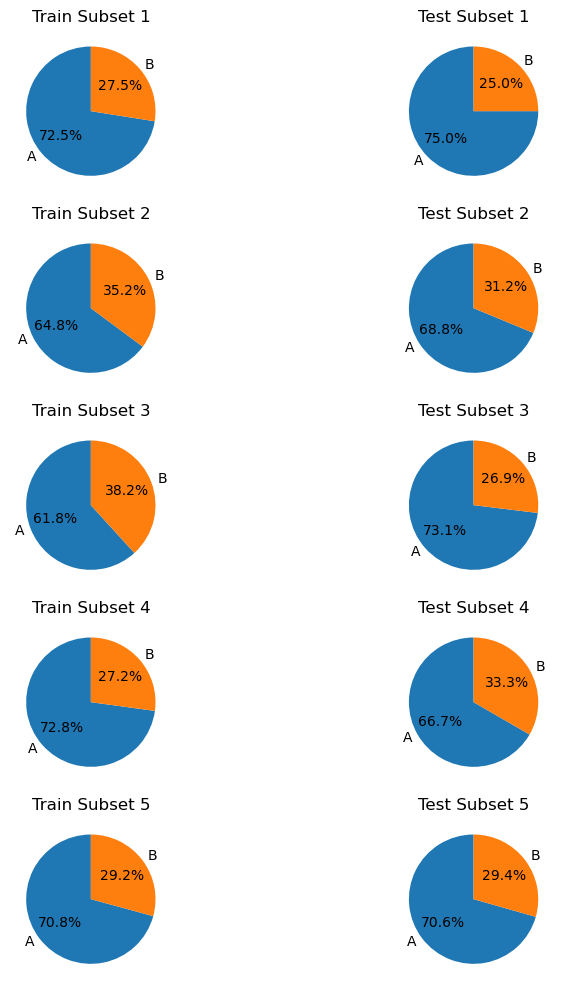

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Impostare il seed per la riproducibilità
np.random.seed(41)

# Creare il DataFrame originale
num_elementi = 1000
percentuale_A = 0.7
colonna = np.random.choice(['A', 'B'], size=num_elementi, p=[percentuale_A, 1 - percentuale_A])
df = pd.DataFrame({'ColonnaAB': colonna})

# Numero di subset desiderato
num_subset = 5

# Creare i subset di dimensioni simili
subset_list = []
for i in range(num_subset):
    subset = df.sample(frac=1/num_subset)
    df = df.drop(subset.index)
    subset_list.append(subset)

# Creare il grafico con 2 torte per ognuno dei N subset
fig, axs = plt.subplots(num_subset, 2, figsize=(10, 2*num_subset))

# Iterare attraverso i subset e disegnare le torte
for i, subset in enumerate(subset_list):
    # Dividere ciascun subset in training set e test set
    train_set, test_set = train_test_split(subset, test_size=0.2, random_state=42) # posso aggiungere stratify=subset['ColonnaAB']

    # Prima colonna: Training Set
    draw_pie(axs[i, 0], train_set['ColonnaAB'].value_counts(normalize=True), f'Train Subset {i + 1}')

    # Seconda colonna: Test Set
    draw_pie(axs[i, 1], test_set['ColonnaAB'].value_counts(normalize=True), f'Test Subset {i + 1}')

# Regolare lo spaziamento tra i subplots
plt.tight_layout()

# Mostrare il grafico
plt.show()